In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
df = pd.read_csv("C:/Users/nandk/OneDrive/Desktop/PROJECTS/New folder/Fraud Detection.csv")

In [3]:
df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud,Column1,isFraud1,DayOfWeek,DayOfWeek(new)
0,7,PAYMENT,Espana,1526.50,C1908839976,0.0,0.0,M1304522697,0.0,0.0,7,0,Savings,03-Jan-18,Afternoon,Safe,7168,0.0,3.0,Wednesday
1,7,PAYMENT,Honduras,1620.17,C70432899,0.0,0.0,M252297858,0.0,0.0,2,0,Savings,05-Jan-18,Night,Safe,7211,0.0,5.0,Friday
2,7,PAYMENT,Indonesia,5689.82,C332151172,0.0,0.0,M1430674428,0.0,0.0,3,0,Savings,07-Jan-18,Morning,Safe,7268,0.0,7.0,Sunday
3,7,PAYMENT,Estados Unidos,2211.07,C1148172078,0.0,0.0,M650835126,0.0,0.0,13,0,Savings,06-Jan-18,Afternoon,Safe,7325,0.0,6.0,Saturday
4,7,PAYMENT,Estados Unidos,824.63,C1142006014,0.0,0.0,M745868137,0.0,0.0,7,0,Savings,06-Jan-18,Morning,Safe,7326,0.0,6.0,Saturday


In [4]:
df["DayOfWeek"] = df["DayOfWeek"].fillna(0).astype(int)

In [5]:
df["isFraud1"] = df["isFraud1"].fillna(0).astype(int)

In [6]:
df.isnull().sum()

step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 0
Column1                 0
isFraud1                0
DayOfWeek               0
DayOfWeek(new)          7
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   step                 10127 non-null  int64  
 1   type                 10123 non-null  object 
 2   branch               10127 non-null  object 
 3   amount               10125 non-null  float64
 4   nameOrig             10121 non-null  object 
 5   oldbalanceOrg        10125 non-null  float64
 6   newbalanceOrig       10127 non-null  float64
 7   nameDest             10121 non-null  object 
 8   oldbalanceDest       10126 non-null  float64
 9   newbalanceDest       10125 non-null  float64
 10  unusuallogin         10127 non-null  int64  
 11  isFlaggedFraud       10127 non-null  int64  
 12  Acct type            10117 non-null  object 
 13  Date of transaction  10120 non-null  object 
 14  Time of day          10125 non-null  object 
 15  isFraud              10127 non-null 

In [8]:
df.duplicated().sum()

0

In [9]:
df.type.value_counts()

PAYMENT     5541
CASH_IN     1953
CASH_OUT    1337
TRANSFER     946
DEBIT        346
Name: type, dtype: int64

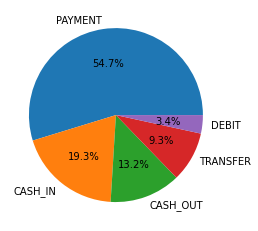

In [10]:
plt.pie(df["type"].value_counts(), labels=df["type"].value_counts().index,autopct='%1.1f%%')
plt.show()

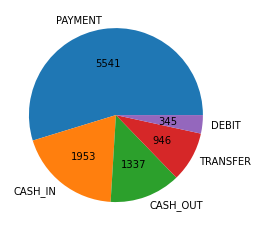

In [11]:
counts = df["type"].value_counts()
labels = counts.index  
plt.pie(counts, labels=labels, autopct=lambda p: f"{int(p * sum(counts) / 100)}")
plt.show()

In [12]:
df["isFraud"].value_counts()

Safe            10057
Fraud              68
Not reviewed        2
Name: isFraud, dtype: int64

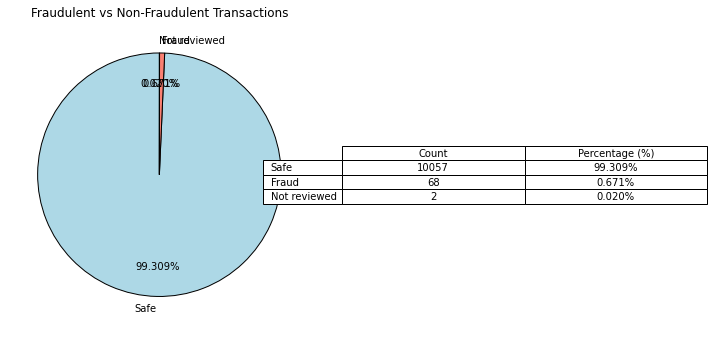

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fraud_counts = df["isFraud"].value_counts()
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

fraud_table = pd.DataFrame({
    "Count": fraud_counts,
    "Percentage (%)": fraud_percentages.map(lambda x: f"{x:.3f}%")
})

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(
    fraud_counts, 
    labels=fraud_counts.index, 
    autopct='%1.3f%%', 
    startangle=90, 
    colors=['lightblue', 'salmon'], 
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.75,  
    labeldistance=1.1   
)
ax[0].set_title("Fraudulent vs Non-Fraudulent Transactions")


ax[1].axis("off")
table = ax[1].table(
    cellText=fraud_table.values, 
    colLabels=fraud_table.columns, 
    rowLabels=fraud_table.index, 
    cellLoc='center', 
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  

plt.show()

In [14]:
df["Acct type"].value_counts()

Savings    6987
Current    3130
Name: Acct type, dtype: int64

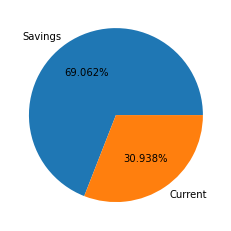

In [15]:
counts = df["Acct type"].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.3f%%')
plt.show()

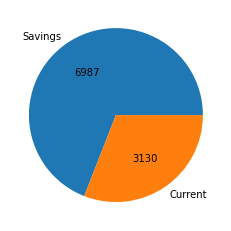

In [16]:
counts = df["Acct type"].value_counts()
labels = counts.index  
plt.pie(counts, labels=labels, autopct=lambda p: f"{int(p * sum(counts) / 100)}")
plt.show()

In [17]:
df["Time of day"].value_counts()

Afternoon    3627
Night        3294
Morning      3204
Name: Time of day, dtype: int64

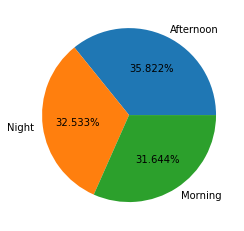

In [18]:
counts = df["Time of day"].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.3f%%')
plt.show()

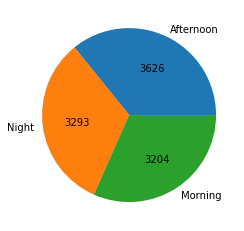

In [19]:
counts = df["Time of day"].value_counts()
labels = counts.index  
plt.pie(counts, labels=labels, autopct=lambda p: f"{int(p * sum(counts) / 100)}")
plt.show()

In [20]:
df = df[df["DayOfWeek"].between(1, 7)] 

In [21]:
df["DayOfWeek"].value_counts()

5    2170
6    2169
4    1446
3    1445
2    1444
7     723
1     723
Name: DayOfWeek, dtype: int64

In [22]:
df["DayOfWeek(new)"].value_counts()

Friday       2170
Saturday     2169
Thursday     1446
Wednesday    1445
Tuesday      1444
Monday        723
Sunday        723
Name: DayOfWeek(new), dtype: int64

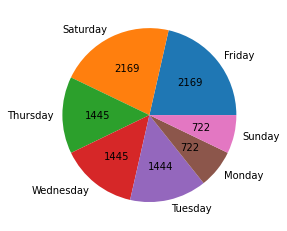

In [23]:
counts = df["DayOfWeek(new)"].value_counts()
labels = counts.index  
plt.pie(counts, labels=labels, autopct=lambda p: f"{int(p * sum(counts) / 100)}")
plt.show()

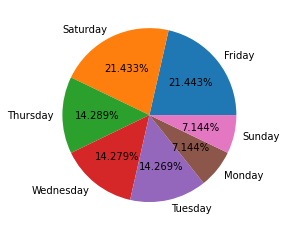

In [24]:
counts = df["DayOfWeek(new)"].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.3f%%')
plt.show()

In [25]:
df["branch"].value_counts()

Estados Unidos    1282
Francia            735
Mexico             670
Australia          633
Alemania           498
                  ... 
Sri Lanka            1
Tunez                1
Albania              1
Oman                 1
Sierra Leona         1
Name: branch, Length: 135, dtype: int64

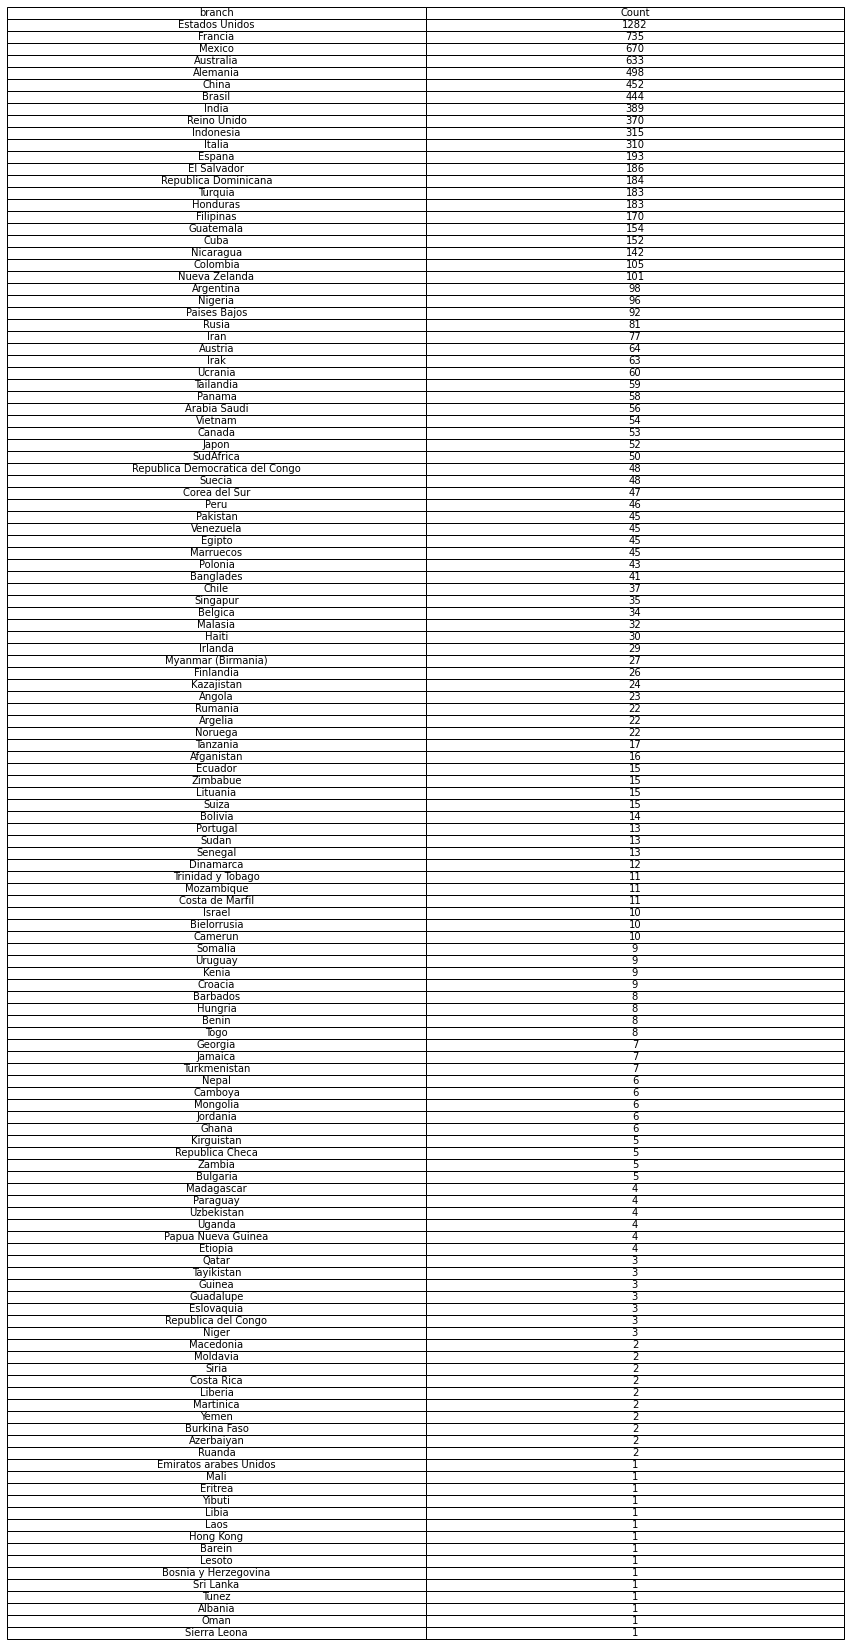

In [26]:
table_data = df["branch"].value_counts().reset_index()
table_data.columns = ["branch", "Count"]
fig, ax = plt.subplots(figsize=(15, 10))  
ax.axis("tight")
ax.axis("off")
ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc="center", loc="center")
plt.show()

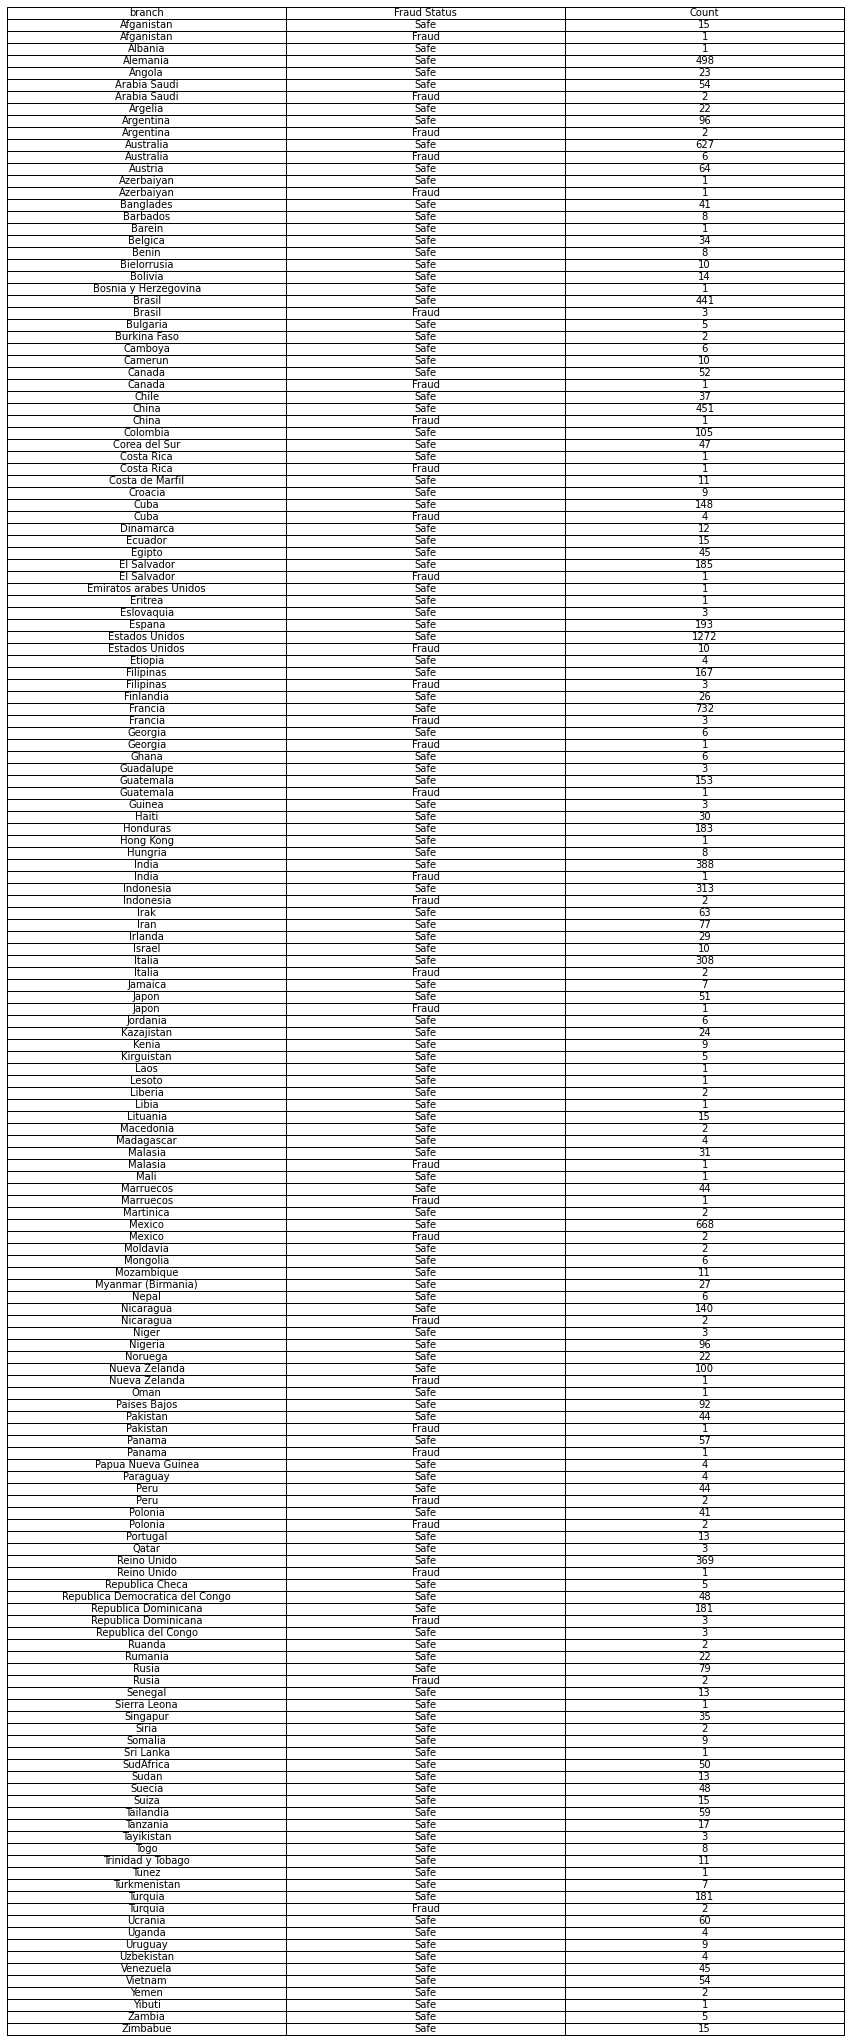

In [27]:
fraud_by_country = df.groupby(["branch", "isFraud1"]).size().reset_index(name="Count")
fraud_by_country["Fraud Status"] = fraud_by_country["isFraud1"].map({0: "Safe", 1: "Fraud"})
fig, ax = plt.subplots(figsize=(15, 10))  
ax.axis("tight")
ax.axis("off")
ax.table(cellText=fraud_by_country[["branch", "Fraud Status", "Count"]].values,
         colLabels=["branch", "Fraud Status", "Count"], cellLoc="center", loc="center")
plt.show()

In [28]:
df["step"].value_counts()

7    2962
1    2704
6    1660
2    1014
5     663
4     565
3     552
Name: step, dtype: int64

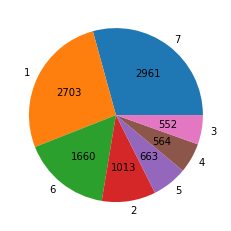

In [29]:
counts = df["step"].value_counts()
labels = counts.index  
plt.pie(counts, labels=labels, autopct=lambda p: f"{int(p * sum(counts) / 100)}")
plt.show()

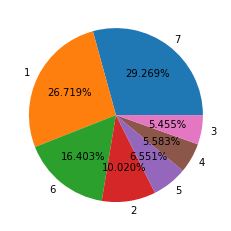

In [30]:
counts = df["step"].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.3f%%')
plt.show()

In [31]:
# Calculate the amount debited from payer's account
df["payerdebited"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

# Calculate the amount credited to receiver's account
df["recievercredited"] = df["newbalanceDest"] - df["oldbalanceDest"]

# Safely extract first character from "nameOrig" to identify payer type
df["payer_type"] = df["nameOrig"].astype(str).str[0]  # Convert to string and get the first character

# Safely extract first character from "nameDest" to identify receiver type
df["reciever_type"] = df["nameDest"].astype(str).str[0]  # Convert to string and get the first character


In [32]:
df['datetime'] = pd.to_datetime('2024-04-01') + pd.to_timedelta(df['step'], unit='h')
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['date'] = df['datetime'].dt.day

In [33]:
df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,...,DayOfWeek,DayOfWeek(new),payerdebited,recievercredited,payer_type,reciever_type,datetime,hour,day_of_week,date
0,7,PAYMENT,Espana,1526.50,C1908839976,0.0,0.0,M1304522697,0.0,0.0,...,3,Wednesday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
1,7,PAYMENT,Honduras,1620.17,C70432899,0.0,0.0,M252297858,0.0,0.0,...,5,Friday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
2,7,PAYMENT,Indonesia,5689.82,C332151172,0.0,0.0,M1430674428,0.0,0.0,...,7,Sunday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
3,7,PAYMENT,Estados Unidos,2211.07,C1148172078,0.0,0.0,M650835126,0.0,0.0,...,6,Saturday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
4,7,PAYMENT,Estados Unidos,824.63,C1142006014,0.0,0.0,M745868137,0.0,0.0,...,6,Saturday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1


In [34]:
df["payer_type"].unique()

array(['C', 'n'], dtype=object)

In [35]:
df["reciever_type"].unique()

array(['M', 'n', 'C'], dtype=object)

In [36]:
df.reciever_type.value_counts()

M    5536
C    4578
n       6
Name: reciever_type, dtype: int64

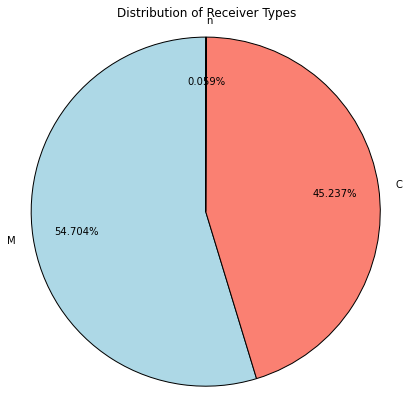

In [37]:
receiver_counts = df["reciever_type"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    receiver_counts, 
    labels=receiver_counts.index, 
    autopct='%1.3f%%', 
    startangle=90, 
    colors=['lightblue', 'salmon', 'lightgreen', 'gold', 'violet'],  
    wedgeprops={'edgecolor': 'black'},  
    pctdistance=0.75,  
    labeldistance=1.1   
)

plt.title("Distribution of Receiver Types")
plt.axis('equal')  

plt.show()

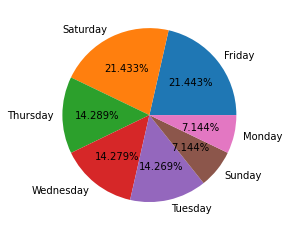

In [38]:
day_counts = df["DayOfWeek"].value_counts()

day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_mapping = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 
              5: "Friday", 6: "Saturday", 7: "Sunday"}

labels = [day_mapping[i] for i in day_counts.index]

plt.pie(day_counts, labels=labels, autopct='%1.3f%%')

plt.show()

In [39]:
df.head()

,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,...,DayOfWeek,DayOfWeek(new),payerdebited,recievercredited,payer_type,reciever_type,datetime,hour,day_of_week,date
0,7,PAYMENT,Espana,1526.50,C1908839976,0.0,0.0,M1304522697,0.0,0.0,...,3,Wednesday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
1,7,PAYMENT,Honduras,1620.17,C70432899,0.0,0.0,M252297858,0.0,0.0,...,5,Friday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
2,7,PAYMENT,Indonesia,5689.82,C332151172,0.0,0.0,M1430674428,0.0,0.0,...,7,Sunday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
3,7,PAYMENT,Estados Unidos,2211.07,C1148172078,0.0,0.0,M650835126,0.0,0.0,...,6,Saturday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1
4,7,PAYMENT,Estados Unidos,824.63,C1142006014,0.0,0.0,M745868137,0.0,0.0,...,6,Saturday,0.0,0.0,C,M,2024-04-01 07:00:00,7,0,1


In [40]:
df.drop(columns=["step","datetime","isFlaggedFraud"], inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (with dtype "object" or mixed types)
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Create a copy of the dataframe to avoid modifying the original one
encoded_df = df.copy()

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    # Convert the column to string before encoding
    encoded_df[col] = encoder.fit_transform(df[col].astype(str))

# The 'encoded_df' now contains the transformed categorical data



In [42]:
todrop=["nameDest",
        "nameOrig",
        "oldbalanceOrg",
        "newbalanceOrig",
        "newbalanceDest",
        "oldbalanceDest",
        "payer_type", 
        ]
encoded_df.drop(columns=todrop,inplace=True)

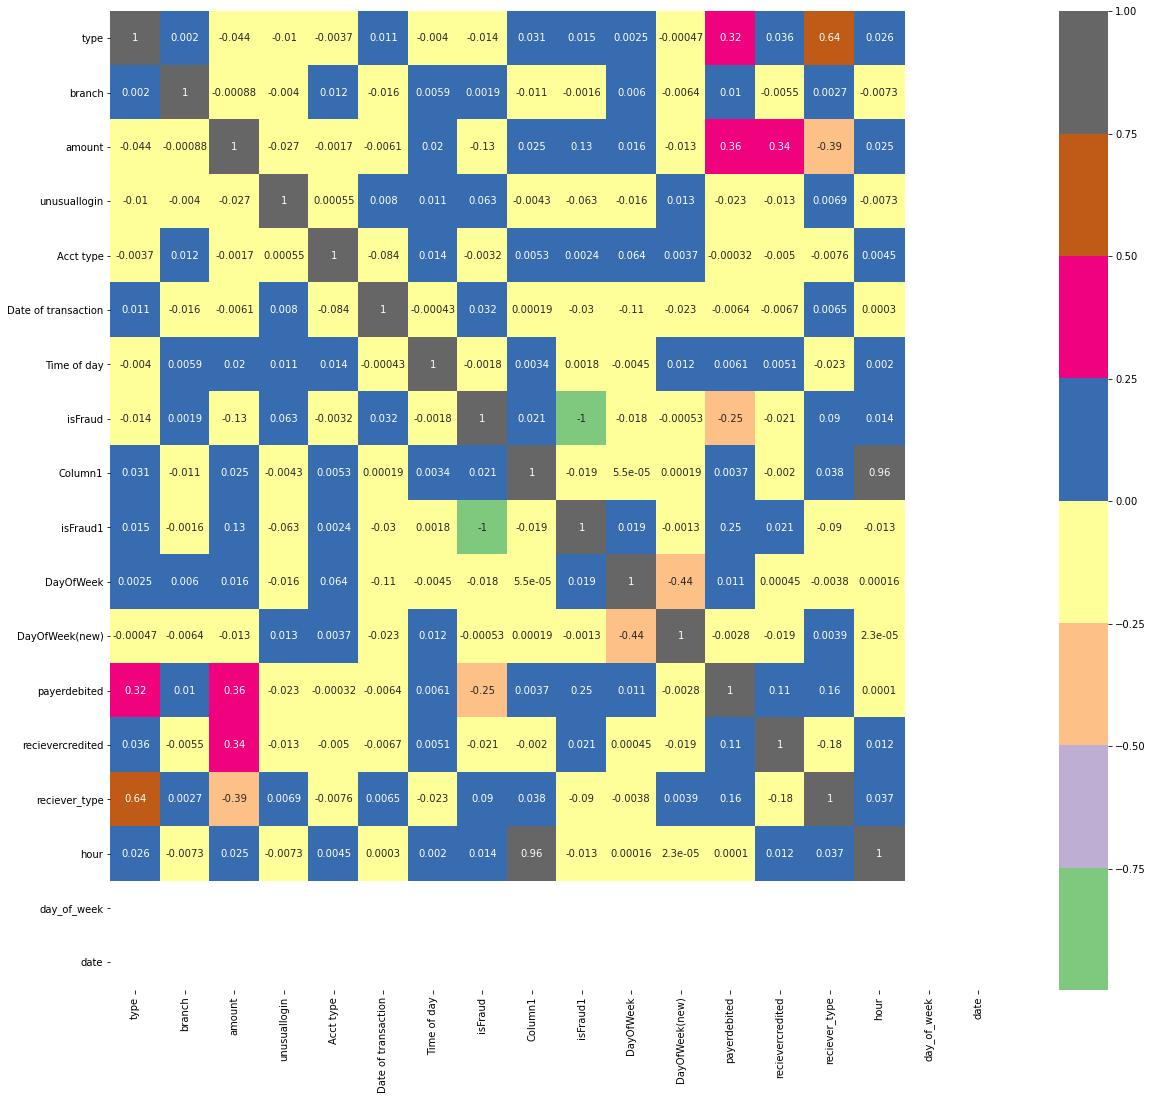

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(20, 18))

# Compute the correlation matrix
corr = encoded_df.corr()

# Create the heatmap with annotations and a color map
sns.heatmap(corr, annot=True, cmap="Accent")

# Show the plot
plt.show()

In [44]:
encoded_df.drop(columns=["recievercredited"],inplace=True)

In [45]:
encoded_df.head()

,type,branch,amount,unusuallogin,Acct type,Date of transaction,Time of day,isFraud,Column1,isFraud1,DayOfWeek,DayOfWeek(new),payerdebited,reciever_type,hour,day_of_week,date
0,3,39,1526.50,7,1,1,0,2,7168,0,3,6,0.0,1,7,0,1
1,3,51,1620.17,2,1,2,2,2,7211,0,5,0,0.0,1,7,0,1
2,3,55,5689.82,3,1,4,1,2,7268,0,7,3,0.0,1,7,0,1
3,3,40,2211.07,13,1,3,0,2,7325,0,6,2,0.0,1,7,0,1
4,3,40,824.63,7,1,3,1,2,7326,0,6,2,0.0,1,7,0,1


In [46]:
import pandas as pd

def outlier_count(data):
    # Ensure the data is numeric
    data = pd.to_numeric(data, errors='coerce')  # Converts non-numeric values to NaN
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upwhisk = Q3 + (IQR * 1.5)
    lowwhisk = Q1 - (IQR * 1.5)
    outlier_count = 0
    
    # Count the outliers
    for value in data:
        if value > upwhisk or value < lowwhisk:
            outlier_count += 1
    return outlier_count

# Initialize the outliers count
outliers = 0

# List of columns to check for outliers
columns = ['hour', 'date', 'day_of_week', 'type', 'amount', 'payerdebited', 'reciever_type']

# Iterate through each column and count outliers
for col in columns:
    outliers += outlier_count(df[col])  # Use df[col] to reference the columns in your DataFrame

print(f'No of Outliers: {outliers}')

No of Outliers: 3898


In [47]:
x=encoded_df.drop(columns="isFraud") #independent variables

In [48]:
x.columns

Index(['type', 'branch', 'amount', 'unusuallogin', 'Acct type',
       'Date of transaction', 'Time of day', 'Column1', 'isFraud1',
       'DayOfWeek', 'DayOfWeek(new)', 'payerdebited', 'reciever_type', 'hour',
       'day_of_week', 'date'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

# Example: Assuming x is your dataset with features
y = x['isFraud1']  # Define target variable
x = x.drop(columns=['isFraud1'])  # Drop target column from features

# Now perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import HistGradientBoostingClassifier

forest = HistGradientBoostingClassifier(random_state=42)
forest.fit(x_train, y_train)


HistGradientBoostingClassifier(random_state=42)

In [56]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [70]:
import pandas as pd

file_path = "C:/Users/nandk/OneDrive/Desktop/PROJECTS/New folder/Fraud Detection.csv"
df = pd.read_csv(file_path)

# Display first few rows and column names
print(df.head())  
print("\nColumn Names:", df.columns.tolist())


   step     type          branch   amount     nameOrig  oldbalanceOrg  \
0     7  PAYMENT          Espana  1526.50  C1908839976            0.0   
1     7  PAYMENT        Honduras  1620.17    C70432899            0.0   
2     7  PAYMENT       Indonesia  5689.82   C332151172            0.0   
3     7  PAYMENT  Estados Unidos  2211.07  C1148172078            0.0   
4     7  PAYMENT  Estados Unidos   824.63  C1142006014            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0             0.0  M1304522697             0.0             0.0             7   
1             0.0   M252297858             0.0             0.0             2   
2             0.0  M1430674428             0.0             0.0             3   
3             0.0   M650835126             0.0             0.0            13   
4             0.0   M745868137             0.0             0.0             7   

   isFlaggedFraud Acct type Date of transaction Time of day isFraud  Column1  \


In [71]:
df["isFraud1"] = df["isFraud1"].fillna(0).astype(int)

In [72]:
import pandas as pd

file_path = "C:/Users/nandk/OneDrive/Desktop/PROJECTS/New folder/Fraud Detection.csv"
df = pd.read_csv(file_path)

# Display first few rows and column names
print(df.head())  
print("\nColumn Names:", df.columns.tolist())


   step     type          branch   amount     nameOrig  oldbalanceOrg  \
0     7  PAYMENT          Espana  1526.50  C1908839976            0.0   
1     7  PAYMENT        Honduras  1620.17    C70432899            0.0   
2     7  PAYMENT       Indonesia  5689.82   C332151172            0.0   
3     7  PAYMENT  Estados Unidos  2211.07  C1148172078            0.0   
4     7  PAYMENT  Estados Unidos   824.63  C1142006014            0.0   

   newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  unusuallogin  \
0             0.0  M1304522697             0.0             0.0             7   
1             0.0   M252297858             0.0             0.0             2   
2             0.0  M1430674428             0.0             0.0             3   
3             0.0   M650835126             0.0             0.0            13   
4             0.0   M745868137             0.0             0.0             7   

   isFlaggedFraud Acct type Date of transaction Time of day isFraud  Column1  \


In [76]:
probabilities = forest.predict_proba(x_test)[:, 1]  # Get fraud probabilities
threshold = 0.3  # Lower threshold to be more sensitive
predictions = (probabilities > threshold).astype(int)

In [77]:
print(x_train.shape)  # Should print (8096, number_of_features)
print(y_train.shape)  # Should print (8096,)


(8096, 15)
(8096,)


In [78]:
x_train, y_train = x_train[:len(y_train)], y_train[:len(x_train)]


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [81]:
# Handle NaN values (replace with column mean) and apply imputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Replace infinity values with a large number
X_train[np.isinf(X_train)] = 1e10

# Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [83]:
def illegal_transac(amount, model_prediction):
    if amount > 200000:
        return 1  # Fraud
    else:
        return model_prediction
y_hat=[illegal_transac(amount, pred) for amount, pred in zip(x_test['amount'], forest.predict(x_test))]

In [92]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.3  # You can experiment with different thresholds
y_pred_adjusted = (y_prob > threshold).astype(int)

# Print the adjusted classification report
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2013
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025



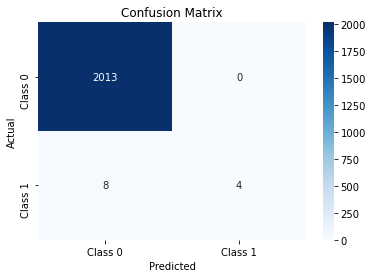

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


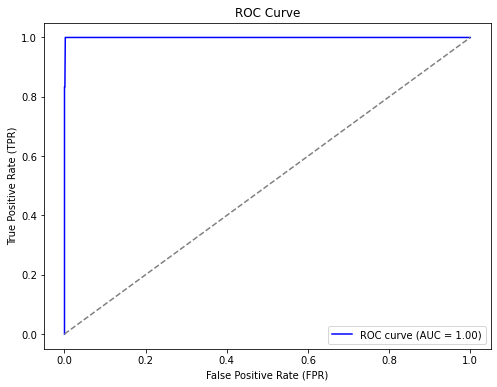

In [96]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities for Class 1 (positive class)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
